In [1]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Oppenheimer/oppenheimer-chart_data-volume-days-pageTypes.csv")

In [3]:
df = df.dropna(axis=1)

In [4]:
df

,days,07/21/2023,07/22/2023,07/23/2023,07/24/2023,07/25/2023,07/26/2023,07/27/2023,07/28/2023,07/29/2023,...,11/28/2023,11/29/2023,11/30/2023,12/01/23,12/02/23,12/03/23,12/04/23,12/05/23,12/06/23,12/07/23
0,Online News,2002,1342,1635,2554,1438,945,786,778,648,...,131,102,491,189,83,163,247,499,720,662
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,68,53,44,53,45,21,22,28,25,...,3,1,2,4,5,4,4,8,4,12
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,462,1336,1607,740,915,416,332,344,267,...,16,11,8,19,9,12,18,8,13,11
7,Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,134,70,85,132,80,67,66,66,44,...,7,11,33,21,13,14,22,25,26,22


In [5]:
engagement = df.copy()

In [6]:
#Transpose Matrix
engagement = engagement.transpose()

In [7]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [8]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [9]:
engagement

,total
date,
2023-07-21,9694
2023-07-22,14647
2023-07-23,10657
2023-07-24,9220
2023-07-25,5166
...,...
2023-12-03,496
2023-12-04,2757
2023-12-05,1297


In [10]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Oppenheimer/oppenheimer-bo.csv")

In [11]:
bo = bo.dropna(axis=0)

In [12]:
bo

,date,revenue,to_date
0,07/21/2023,"$33,017,635","$33,017,635"
1,07/22/2023,"$26,248,140","$59,265,775"
2,07/23/2023,"$23,189,645","$82,455,420"
3,07/24/2023,"$12,671,950","$95,127,370"
4,07/25/2023,"$12,073,530","$107,200,900"
...,...,...,...
135,12/03/2023,"$3,995","$325,387,970"
136,12/04/2023,$490,"$325,388,460"
137,12/05/2023,$835,"$325,389,295"
138,12/06/2023,$545,"$325,389,840"


In [13]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [14]:
bo

,revenue,to_date
date,,
07/21/2023,33017635,"$33,017,635"
07/22/2023,26248140,"$59,265,775"
07/23/2023,23189645,"$82,455,420"
07/24/2023,12671950,"$95,127,370"
07/25/2023,12073530,"$107,200,900"
...,...,...
12/03/2023,3995,"$325,387,970"
12/04/2023,490,"$325,388,460"
12/05/2023,835,"$325,389,295"


In [15]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [16]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [17]:
engagement_ts

,total
date,
2023-07-21,9694
2023-07-22,14647
2023-07-23,10657
2023-07-24,9220
2023-07-25,5166
...,...
2023-12-03,496
2023-12-04,2757
2023-12-05,1297


In [18]:
bo_ts.head(45)

,revenue,to_date
date,,
07/21/2023,33017635,"$33,017,635"
07/22/2023,26248140,"$59,265,775"
07/23/2023,23189645,"$82,455,420"
07/24/2023,12671950,"$95,127,370"
07/25/2023,12073530,"$107,200,900"
07/26/2023,10655845,"$117,856,745"
07/27/2023,10003685,"$127,860,430"
07/28/2023,13427475,"$141,287,905"
07/29/2023,18217115,"$159,505,020"


In [19]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [20]:
combined_df.tail(60)

,total,revenue
date,,
2023-10-09,213,85615
2023-10-10,207,49915
2023-10-11,223,46220
2023-10-12,314,41760
2023-10-13,502,69940
2023-10-14,239,158945
2023-10-15,407,84870
2023-10-16,350,40990
2023-10-17,266,48100


In [21]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [22]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -5.114150
p-value: 0.000013
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578
ADF Statistic: -5.923862
p-value: 0.000000
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


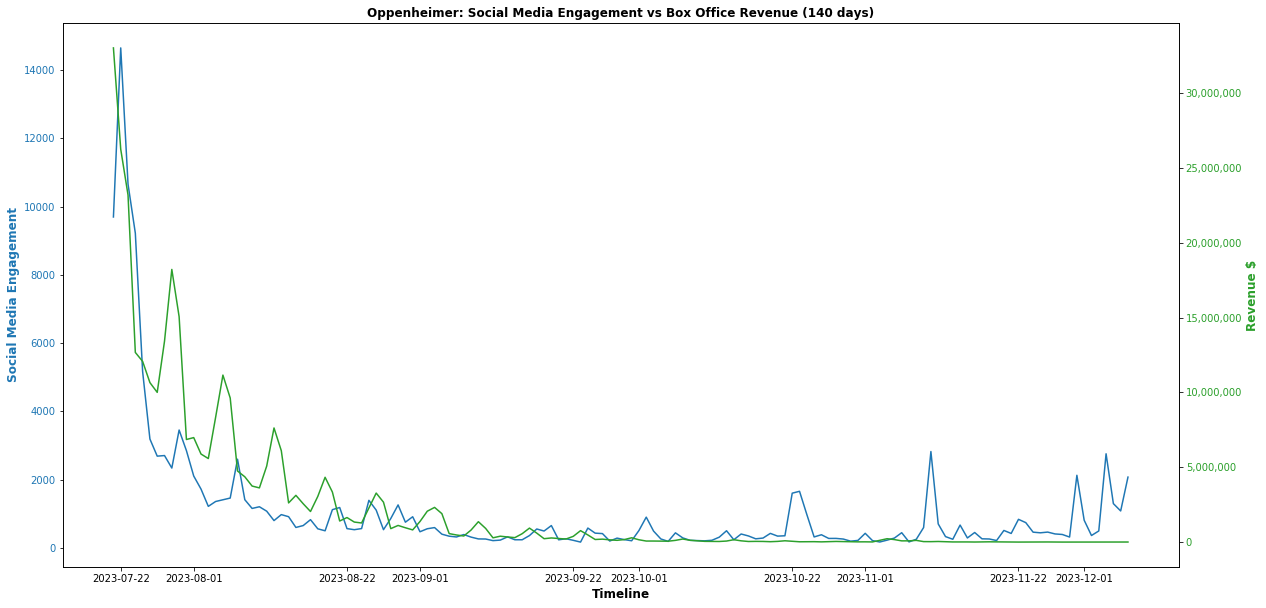

In [23]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('Oppenheimer: Social Media Engagement vs Box Office Revenue (140 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [245]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [246]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.8483556372281896


Maximum Pearson correlation coefficient: 0.8915020062428574
Lag associated with Maximum Pearson correlation coefficient: 1


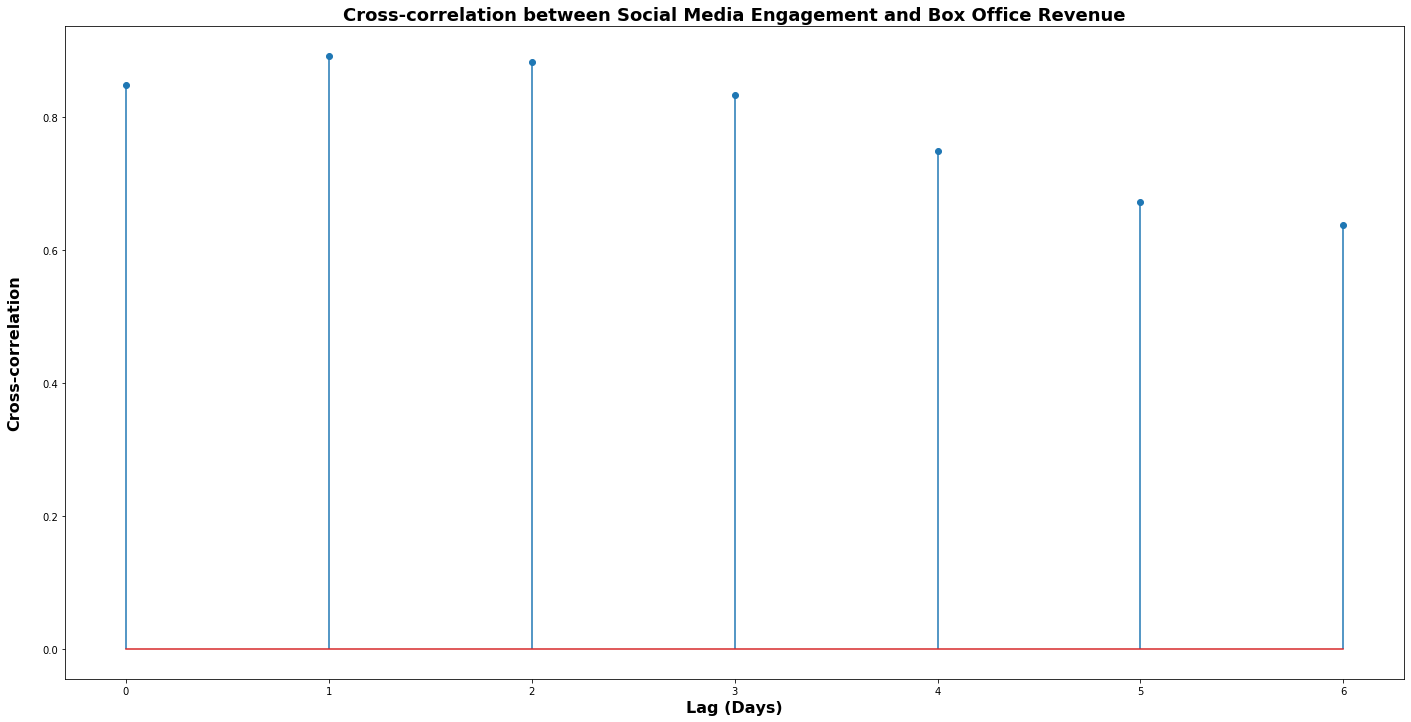

In [247]:
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 7)  # Example lag values from 0 to 12
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation(combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('Cross-correlation between Social Media Engagement and Box Office Revenue',fontsize=18,fontweight='bold')
plt.show()

In [248]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine your datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
# The maxlag parameter is the maximum lag to test for, and the test 'ssr_chi2test' is one of the possible tests
granger_test_results = grangercausalitytests(combined_df, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=58.5282 , p=0.0000  , df_denom=136, df_num=1
ssr based chi2 test:   chi2=59.8193 , p=0.0000  , df=1
likelihood ratio test: chi2=49.7512 , p=0.0000  , df=1
parameter F test:         F=58.5282 , p=0.0000  , df_denom=136, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.9545 , p=0.0000  , df_denom=133, df_num=2
ssr based chi2 test:   chi2=28.9582 , p=0.0000  , df=2
likelihood ratio test: chi2=26.2876 , p=0.0000  , df=2
parameter F test:         F=13.9545 , p=0.0000  , df_denom=133, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.2918 , p=0.0000  , df_denom=130, df_num=3
ssr based chi2 test:   chi2=32.5379 , p=0.0000  , df=3
likelihood ratio test: chi2=29.1941 , p=0.0000  , df=3
parameter F test:         F=10.2918 , p=0.0000  , df_denom=130, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.3917  , p=0.0000  

In [249]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,4Chan
07/21/2023,2002,0,68,0,0,0,462,0,0,134,246,60,5901,0,19,802,0
07/22/2023,1342,0,53,0,0,0,1336,0,0,70,375,33,10527,0,11,900,0
07/23/2023,1635,0,44,0,0,0,1607,0,0,85,303,25,6001,0,4,953,0
07/24/2023,2554,0,53,0,1,0,740,0,0,132,326,45,4472,0,8,889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/03/23,163,0,4,0,0,0,12,0,0,14,57,2,163,0,0,81,0
12/04/23,247,0,4,0,0,0,18,0,0,22,11,0,2342,0,1,112,0
12/05/23,499,0,8,0,0,0,8,0,0,25,11,0,682,0,4,60,0
12/06/23,720,0,4,0,0,0,13,0,0,26,33,2,223,0,1,60,0


In [250]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [251]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [252]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [253]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [254]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Blogs,Forums,Facebook Public,X,Review,Reddit
07/21/2023,2002,68,0,462,134,246,60,5901,19,802
07/22/2023,1342,53,0,1336,70,375,33,10527,11,900
07/23/2023,1635,44,0,1607,85,303,25,6001,4,953
07/24/2023,2554,53,1,740,132,326,45,4472,8,889
07/25/2023,1438,45,0,915,80,207,14,1700,6,761
...,...,...,...,...,...,...,...,...,...,...
12/03/23,163,4,0,12,14,57,2,163,0,81
12/04/23,247,4,0,18,22,11,0,2342,1,112
12/05/23,499,8,0,8,25,11,0,682,4,60
12/06/23,720,4,0,13,26,33,2,223,1,60


In [255]:
shift = -1 #Based on Lag

In [256]:
bo_series = bo['revenue']

In [257]:
bo_series

date
07/21/2023    33017635
07/22/2023    26248140
07/23/2023    23189645
07/24/2023    12671950
07/25/2023    12073530
                ...   
12/03/2023        3995
12/04/2023         490
12/05/2023         835
12/06/2023         545
12/07/2023        5220
Name: revenue, Length: 140, dtype: int64

In [258]:
bo_series_shifted = bo_series.shift(shift)

In [259]:
bo_series_shifted = bo_series_shifted[:shift]

In [260]:
bo_series_shifted

date
07/21/2023    26248140.0
07/22/2023    23189645.0
07/23/2023    12671950.0
07/24/2023    12073530.0
07/25/2023    10655845.0
                 ...    
12/02/2023        3995.0
12/03/2023         490.0
12/04/2023         835.0
12/05/2023         545.0
12/06/2023        5220.0
Name: revenue, Length: 139, dtype: float64

In [261]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [262]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Blogs,Forums,Facebook Public,X,Review,Reddit
07/21/2023,2002,68,0,462,134,246,60,5901,19,802
07/22/2023,1342,53,0,1336,70,375,33,10527,11,900
07/23/2023,1635,44,0,1607,85,303,25,6001,4,953
07/24/2023,2554,53,1,740,132,326,45,4472,8,889
07/25/2023,1438,45,0,915,80,207,14,1700,6,761
...,...,...,...,...,...,...,...,...,...,...
12/02/23,83,5,0,9,13,14,0,185,0,54
12/03/23,163,4,0,12,14,57,2,163,0,81
12/04/23,247,4,0,18,22,11,0,2342,1,112
12/05/23,499,8,0,8,25,11,0,682,4,60


In [263]:
reg_engagement = reg_engagement.astype(int)

In [264]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Blogs,Forums,Facebook Public,X,Review,Reddit
07/21/2023,2002,68,0,462,134,246,60,5901,19,802
07/22/2023,1342,53,0,1336,70,375,33,10527,11,900
07/23/2023,1635,44,0,1607,85,303,25,6001,4,953
07/24/2023,2554,53,1,740,132,326,45,4472,8,889
07/25/2023,1438,45,0,915,80,207,14,1700,6,761
...,...,...,...,...,...,...,...,...,...,...
12/02/23,83,5,0,9,13,14,0,185,0,54
12/03/23,163,4,0,12,14,57,2,163,0,81
12/04/23,247,4,0,18,22,11,0,2342,1,112
12/05/23,499,8,0,8,25,11,0,682,4,60


In [265]:
bo_series_shifted

date
07/21/2023    26248140.0
07/22/2023    23189645.0
07/23/2023    12671950.0
07/24/2023    12073530.0
07/25/2023    10655845.0
                 ...    
12/02/2023        3995.0
12/03/2023         490.0
12/04/2023         835.0
12/05/2023         545.0
12/06/2023        5220.0
Name: revenue, Length: 139, dtype: float64

In [266]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series_shifted  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     72.77
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           6.72e-48
Time:                        13:38:38   Log-Likelihood:                -2190.0
No. Observations:                 139   AIC:                             4402.
Df Residuals:                     128   BIC:                             4434.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.103e+06   1.49e+05     

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [267]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
Forums             1.926661e+06
YouTube            1.765702e+06
Blogs              1.550161e+06
Online News        1.158433e+06
Review             4.424335e+05
X                  3.828905e+05
Reddit             3.536155e+05
Facebook           2.862110e+05
Facebook Public    2.686872e+05
Tumblr             4.930086e+04
dtype: float64
